In [15]:
import numpy as np
import sys
import math
import timeit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol
from simtk.openmm import openmm
from typing import Any, List, Optional, Tuple

ModuleNotFoundError: No module named 'simtk'

In [ ]:
import os

In [69]:
chignolin = Chem.rdmolfiles.MolFromPDBFile("../idp_rl/molecule_generation/chignolin/GYDPETGTWG_autopsf.pdb", removeHs=False)

In [47]:
print(chignolin.GetAtomWithIdx(16).GetSymbol())
print(chignolin.GetAtomWithIdx(16).GetTotalValence())

C
4


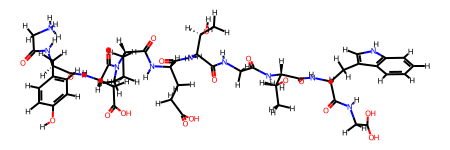

In [70]:
chignolin

In [66]:
Chem.AllChem.EmbedMultipleConfs(chignolin)
Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(chignolin, nonBondedThresh=10., numConfs=1)

[14:10:42] Molecule does not have explicit Hs. Consider calling AddHs()


ArgumentError: Python argument types in
    rdkit.Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(Mol)
did not match C++ signature:
    MMFFOptimizeMoleculeConfs(RDKit::ROMol {lvalue} self, int numThreads=1, int maxIters=200, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > mmffVariant='MMFF94', double nonBondedThresh=100.0, bool ignoreInterfragInteractions=True)

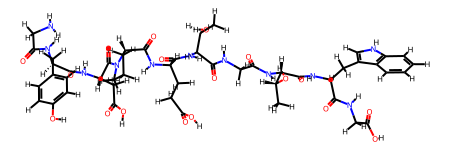

In [68]:
def preprocess_mol(mol: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    mol = Chem.AddHs(mol)
    # Chem.SanitizeMol(mol,Chem.SanitizeFlags.SANITIZE_FINDRADICALS|Chem.SanitizeFlags.SANITIZE_KEKULIZE|Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|Chem.SanitizeFlags.SANITIZE_SYMMRINGS,catchErrors=True)
    Chem.SanitizeMol(mol)
    return mol

chignolin = Chem.rdmolfiles.MolFromFASTA("GYDPETGTWG")
chignolin = preprocess_mol(chignolin)
Chem.AllChem.EmbedMultipleConfs(chignolin, numConfs=1)
Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(chignolin, nonBondedThresh=10., )
Chem.rdmolfiles.MolToPDBFile(chignolin, "GYDPETGTWG.pdb")
chignolin

In [58]:
def preprocess_mol(mol: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    mol = Chem.AddHs(mol)
    Chem.SanitizeMol(mol,Chem.SanitizeFlags.SANITIZE_FINDRADICALS|Chem.SanitizeFlags.SANITIZE_KEKULIZE|Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|Chem.SanitizeFlags.SANITIZE_SYMMRINGS,catchErrors=True)
    return mol

chignolin = Chem.rdmolfiles.MolFromFASTA("GYDPETGTWG")
chignolin = preprocess_mol(chignolin)
Chem.AllChem.EmbedMultipleConfs(chignolin, numConfs=1)
Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(chignolin, nonBondedThresh=10., 00)
chignolin

SyntaxError: positional argument follows keyword argument (3216339492.py, line 9)

In [7]:
def drawConformer(mol: Chem.Mol, confIds: int=[-1], size: Tuple[int, int]=(300, 300), style: str="stick") -> py3Dmol.view:
    """Displays interactive 3-dimensional representation of specified conformer.

    Parameters
    ----------
    mol : RDKit Mol object
        The molecule containing the conformer to be displayed.
    confId : int
        The ID of the conformer to be displayed.
    size : Tuple[int, int]
        The size of the display (width, height).
    style: str
        The drawing style for displaying the molecule. Can be sphere, stick, line, cross, cartoon, and surface.
    """
    view = py3Dmol.view(width=size[0], height=size[1])
    for confId in confIds:
        block = Chem.MolToMolBlock(mol, confId=confId)
        view.addModel(block, 'mol')
    view.setStyle({style : {}})
    view.zoomTo()
    return view

drawConformer(chignolin)

NameError: name 'Tuple' is not defined

In [114]:
def get_conformer_energies(mol: Chem.Mol) -> List[float]:
    """Returns a list of energies for each conformer in `mol`.
    """
    energies = []
    Chem.rdForceFieldHelpers.MMFFSanitizeMolecule(mol)
    mmff_props = Chem.rdForceFieldHelpers.MMFFGetMoleculeProperties(mol)
    for conf in mol.GetConformers():
        ff = Chem.rdForceFieldHelpers.MMFFGetMoleculeForceField(mol, mmff_props, confId=conf.GetId())
        energy = ff.CalcEnergy()
        energies.append(energy)
    
    return np.asarray(energies, dtype=float)

Chem.AllChem.EmbedMultipleConfs(chignolin)
Chem.rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(chignolin, nonBondedThresh=10.)
get_conformer_energies(chignolin)

array([153.84743904, 423.53962217, 119.73155303, 120.54482458,
       155.43780857, 138.82474895, 187.02058731, 126.34158447,
       135.08605823, 137.41269152])

In [127]:
drawConformer(chignolin, confIds=list(range(2)))

ValueError: Bad Conformer Id

In [122]:
[x for x in chignolin.GetConformers()]

[]

In [124]:
Chem.AllChem.EmbedMultipleConfs(chignolin)
chignolin.GetNumConformers()

10

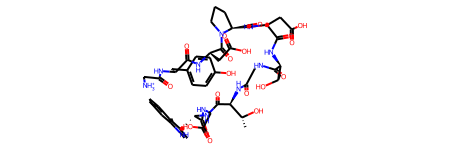

In [125]:
chignolin = Chem.MolFromPDBFile("1uao.pdb")
chignolin

In [126]:
drawConformer(chignolin, confIds=list(range(1)))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [130]:
output = Chem.MolFromPDBFile("output.pdb")
drawConformer(output, confIds=list(range(1)))

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToMolBlock(NoneType)
did not match C++ signature:
    MolToMolBlock(RDKit::ROMol mol, bool includeStereo=True, int confId=-1, bool kekulize=True, bool forceV3000=False)

In [2]:
truth = Chem.rdmolfiles.MolFromPDBFile("truth/1UAO.pdb", removeHs=False)

In [6]:
truth.GetConformer(0)

In [9]:
"""
We can also visualize multiple generated conformers within a dataset.
"""
import py3Dmol

mol = truth 
size = (500,300)

confIds = [0, 1, 2, 3, 4, 5]
view = py3Dmol.view(width=size[0], height=size[1])

for confId in confIds:
    block = Chem.MolToMolBlock(mol, confId=confId)
    view.addModel(block, 'mol')
    
view.setStyle({"stick" : {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
import rdkit.Chem.AllChem as Chem

Chem.MMFFSanitizeMolecule(mol)
mmff_props = Chem.MMFFGetMoleculeProperties(mol)

[16:58:25] Molecule does not have explicit Hs. Consider calling AddHs()


In [13]:
energies = []

for i in range(18):
    ff = Chem.MMFFGetMoleculeForceField(mol, mmff_props, confId=i)
    energy = ff.CalcEnergy()
    energies.append(energy)

(array([1., 1., 1., 1., 4., 1., 3., 3., 1., 2.]),
 array([311.28216195, 316.08875261, 320.89534326, 325.70193392,
        330.50852458, 335.31511523, 340.12170589, 344.92829655,
        349.7348872 , 354.54147786, 359.34806852]),
 <BarContainer object of 10 artists>)

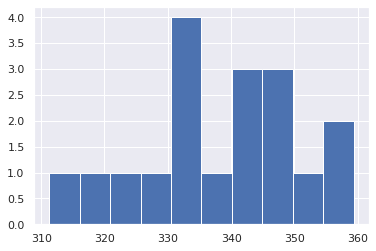

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

plt.hist(energies)

In [17]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import TorsionFingerprints

def get_torsion_tuples(mol):
    """Gets the tuples for the torsion angles of the molecule.

    Parameters
    ----------
    mol : RDKit molecule
        Molecule for which torsion angles are to be extracted

    * tuples_original, tuples_reindexed : list[int]
        Tuples (quadruples) of indices that correspond to torsion angles. The first returns indices
        for the original molecule and the second for a version of the molecule with Hydrogens removed
        (since there are many cases where this stripped molecule is of interest)
    """

    [mol.GetAtomWithIdx(i).SetProp("original_index", str(i)) for i in range(mol.GetNumAtoms())]
    stripped_mol = Chem.rdmolops.RemoveHs(mol)

    nonring, _ = TorsionFingerprints.CalculateTorsionLists(mol)
    nonring_original = [list(atoms[0]) for atoms, ang in nonring]
            
    original_to_stripped = {
        int(stripped_mol.GetAtomWithIdx(reindex).GetProp("original_index")) : reindex 
        for reindex in range(stripped_mol.GetNumAtoms())
    }
    nonring_reindexed = [
        [original_to_stripped[original] for original in atom_group] 
        for atom_group in nonring_original
    ]

    return nonring_original, nonring_reindexed

In [20]:
nonring, ring = TorsionFingerprints.CalculateTorsionLists(mol)

In [135]:
angles = TorsionFingerprints.CalculateTorsionAngles(mol, nonring, ring, confId=4)

In [98]:
angles[1]

([180.06549695896206], 180.0)

In [96]:
nonring[20]

([(75, 72, 71, 58)], 180.0)

In [109]:
from rdkit.Chem import rdMolTransforms

conf = mol.GetConformer(0)
angle = rdMolTransforms.GetDihedralDeg(conf, *nonring[5][0][0])

86.56377897983234

In [108]:
nonring[5][0]

[(15, 14, 13, 10), (16, 14, 13, 10)]

In [139]:
nonring, _ = TorsionFingerprints.CalculateTorsionLists(mol)
full_dihedrals = []
for conf_id in range(mol.GetNumConformers()):
    conf = mol.GetConformer(conf_id)
    dihedral_angles = []
    for torsion_tup in nonring:
        dihedral_angle = rdMolTransforms.GetDihedralDeg(conf, *torsion_tup[0][0])
        if dihedral_angle < 0:
            dihedral_angle += 360
        dihedral_angles.append(dihedral_angle)
    full_dihedrals.append(dihedral_angles)
full_dihedrals = np.array(full_dihedrals)

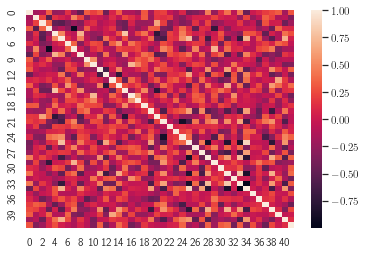

In [141]:
cov = np.corrcoef(full_dihedrals.T)

sns.set_style("whitegrid")
plt.rcParams['text.usetex'] = True
plt.rcParams["axes.grid"] = False
blue, = sns.color_palette("muted", 1)

ax = sns.heatmap(cov)
plt.show()

In [142]:
np.sum(cov)

34.710043210295325